<h2 align="center" style="color:blue">IMPORTING LIBRARIES</h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2 align="center" style="color:blue">DATA LOADING</h2>

In [10]:
df = pd.read_excel("premiums_young_with_gr.xlsx")
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4


In [11]:
df.shape

(20096, 14)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20096 entries, 0 to 20095
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    20096 non-null  int64 
 1   Gender                 20096 non-null  object
 2   Region                 20096 non-null  object
 3   Marital_status         20096 non-null  object
 4   Number Of Dependants   20096 non-null  int64 
 5   BMI_Category           20096 non-null  object
 6   Smoking_Status         20094 non-null  object
 7   Employment_Status      20095 non-null  object
 8   Income_Level           20092 non-null  object
 9   Income_Lakhs           20096 non-null  int64 
 10  Medical History        20096 non-null  object
 11  Insurance_Plan         20096 non-null  object
 12  Annual_Premium_Amount  20096 non-null  int64 
 13  Genetical_Risk         20096 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 2.1+ MB


In [123]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.tail(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
20093,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111,5
20094,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564,4
20095,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,9490,5


<h2 align="center" style="color:blue">EXPLORATORY DATA ANALYSIS & DATA CLEANING</h2>

### Handle Missing Values

In [124]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [125]:
df.dropna(inplace=True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

### Handling Duplicates

In [126]:
df.drop_duplicates()
df.duplicated().sum()

0

In [127]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


### Data Cleaning - Number of Dependents

In [128]:
df[df["number_of_dependants"]<0]["number_of_dependants"].unique()

array([-3, -1], dtype=int64)

In [129]:
df["number_of_dependants"] = df["number_of_dependants"].abs()

In [130]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


## 1. Numeric Columns

### Univariate Analysis: Numeric Columns

##### Box Plots for Numeric Columns

In [131]:
numeric_columns = df.select_dtypes(include=["int64","float64"]).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

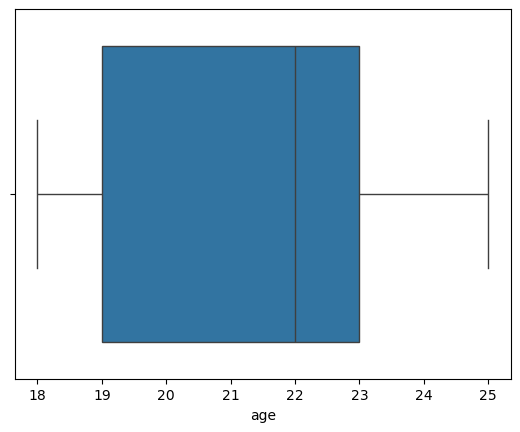

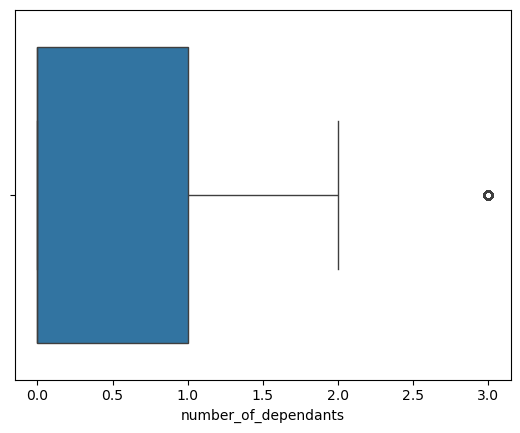

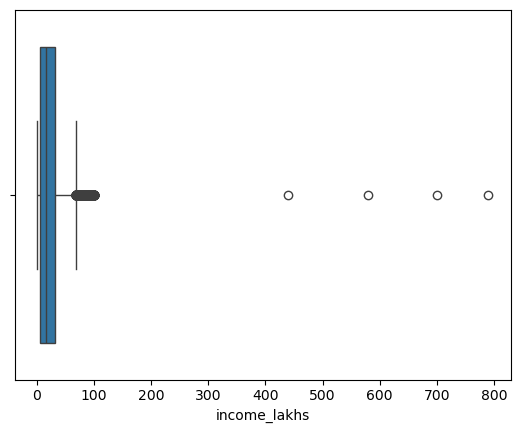

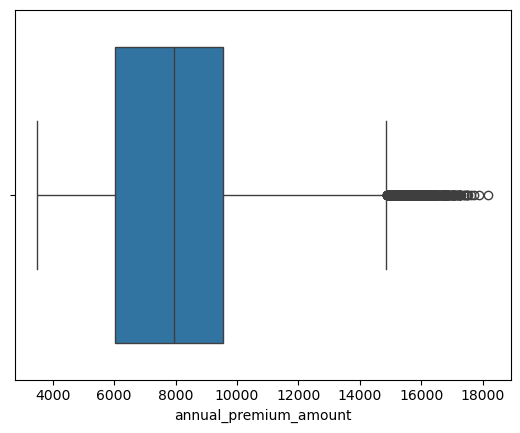

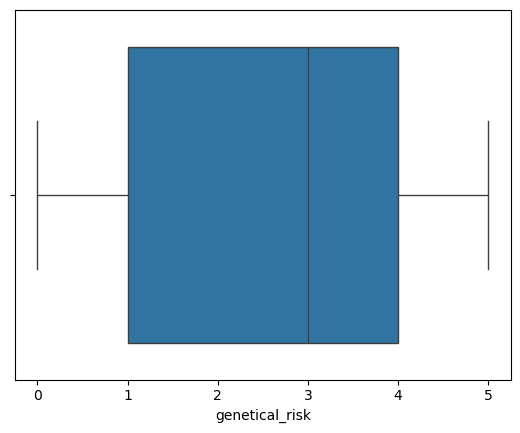

In [132]:
for i in numeric_columns:
    sns.boxplot(x=df[i])
    plt.show()

### Outlier Treatment: Age Column

In [133]:
df[df.age > 100]["age"].unique()

array([], dtype=int64)

In [134]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

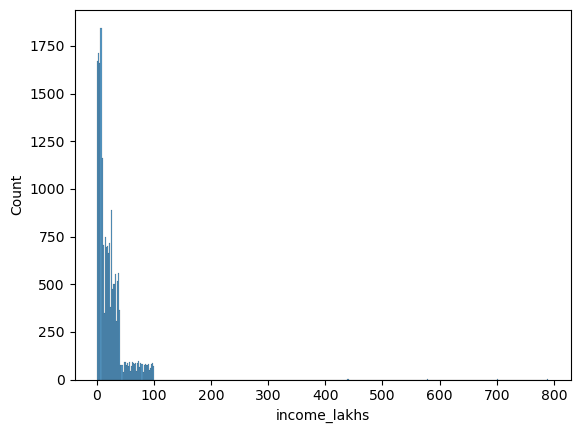

In [135]:
sns.histplot(df1.income_lakhs)

In [136]:
Q1 = df1['income_lakhs'].quantile(0.25)
Q3 = df1['income_lakhs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -31.5
Upper Bound: 68.5


This dataset is based in India, where the maximum earnings of individuals are likely to exceed the upper bound of the interquartile range (IQR). Therefore, we are using the normal distribution's quantiles to calculate the income levels, allowing us to account for and unbound potential outliers in the data

In [137]:
quantity_threshold = df1.income_lakhs.quantile(0.999)
quantity_threshold

100.0

In [138]:
df2 = df1[df1.income_lakhs <= quantity_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


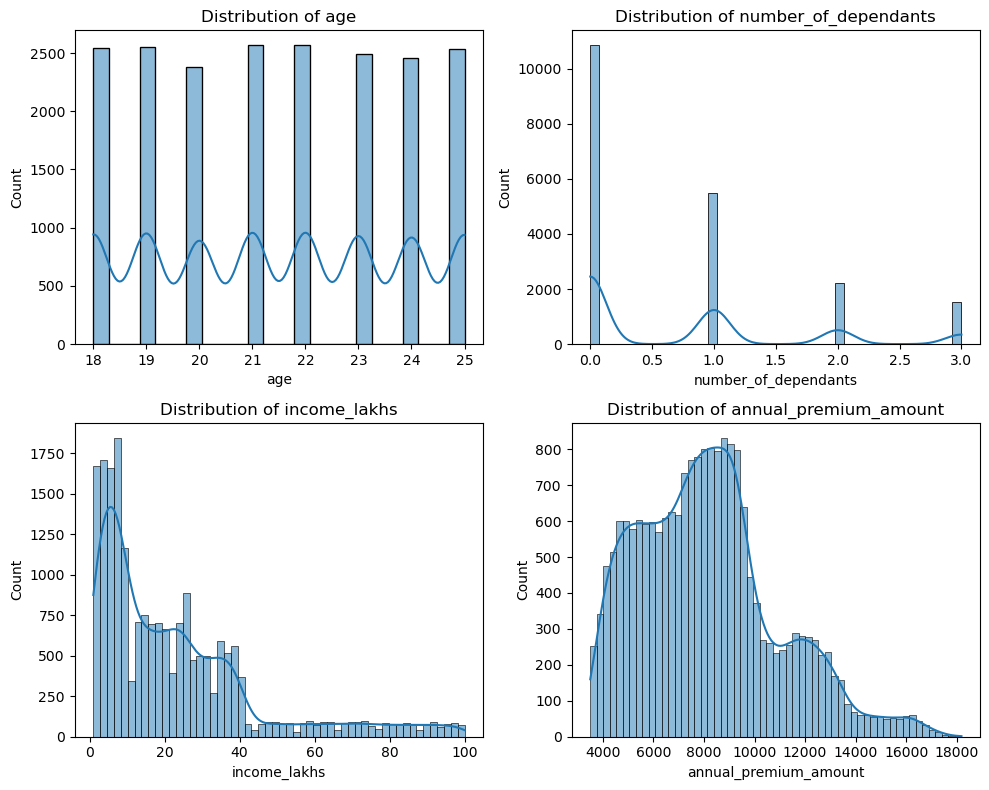

In [139]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))


axes = axes.flatten()

for i, col in enumerate(numeric_columns[:4]):
    sns.histplot(df2[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

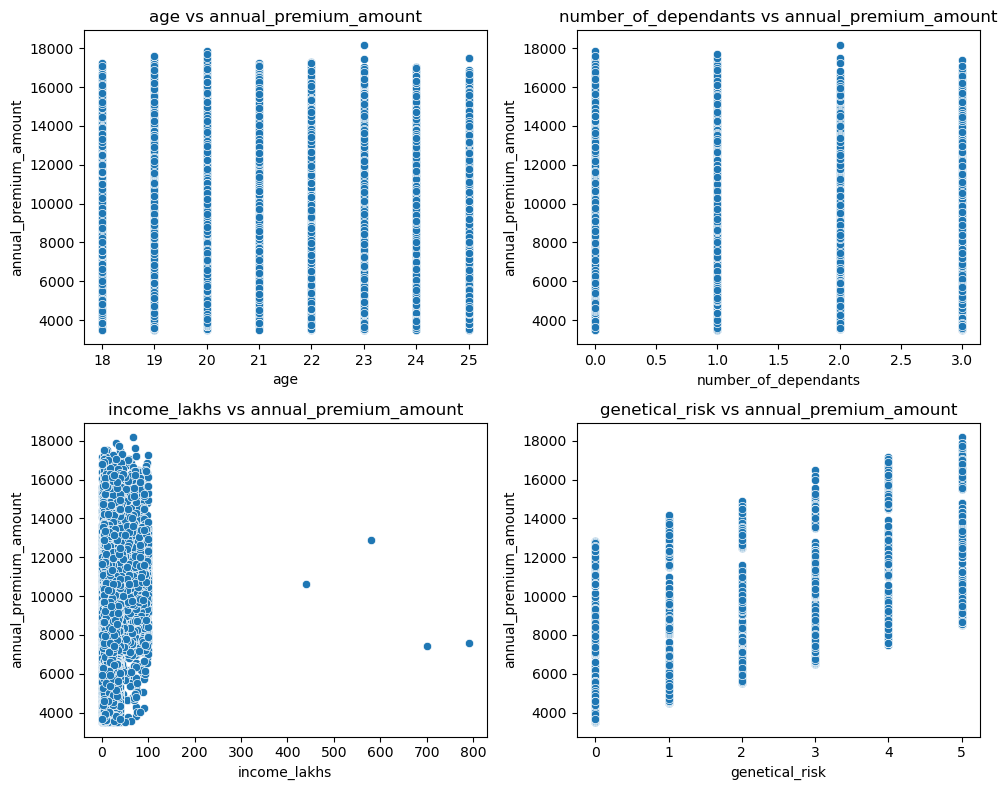

In [140]:

numeric_features = ["age", "number_of_dependants", "income_lakhs", "genetical_risk"]
y = "annual_premium_amount"

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through the numeric features and plot scatter plots
for i, feature in enumerate(numeric_features):
    sns.scatterplot(data=df, x=feature, y=y, ax=axes[i])
    axes[i].set_title(f'{feature} vs {y}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Catergorical Feature

In [141]:
categorical_features = [ feature for feature in df2.columns if df2[feature].dtype == "O"]
print(categorical_features)

['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']


In [142]:
for feature in categorical_features:
    unique = df2[feature].unique()
    print(feature,":",unique)

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [143]:
df2["smoking_status"].replace({
    "No Smoking" : "Not Smoking",
    "Smoking=0" : "Not Smoking",
    "Does Not Smoke" : "Not Smoking"
},inplace=True)
df2["smoking_status"].unique()

C:\Users\smjha\AppData\Local\Temp\ipykernel_30116\1420607774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["smoking_status"].replace({


array(['Regular', 'Not Smoking', 'Occasional'], dtype=object)

In [144]:
pct = df2["gender"].value_counts(normalize=True)
pct

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

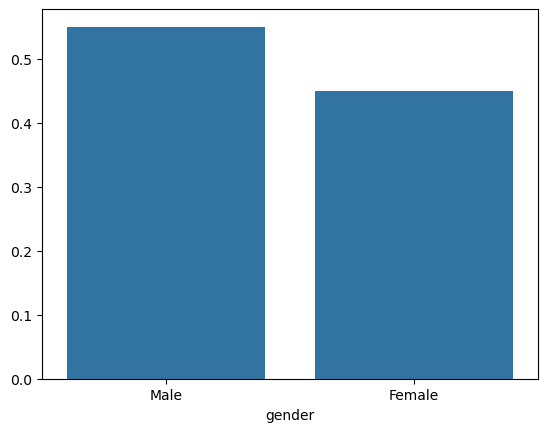

In [145]:
sns.barplot(x=pct.index,y=pct.values)

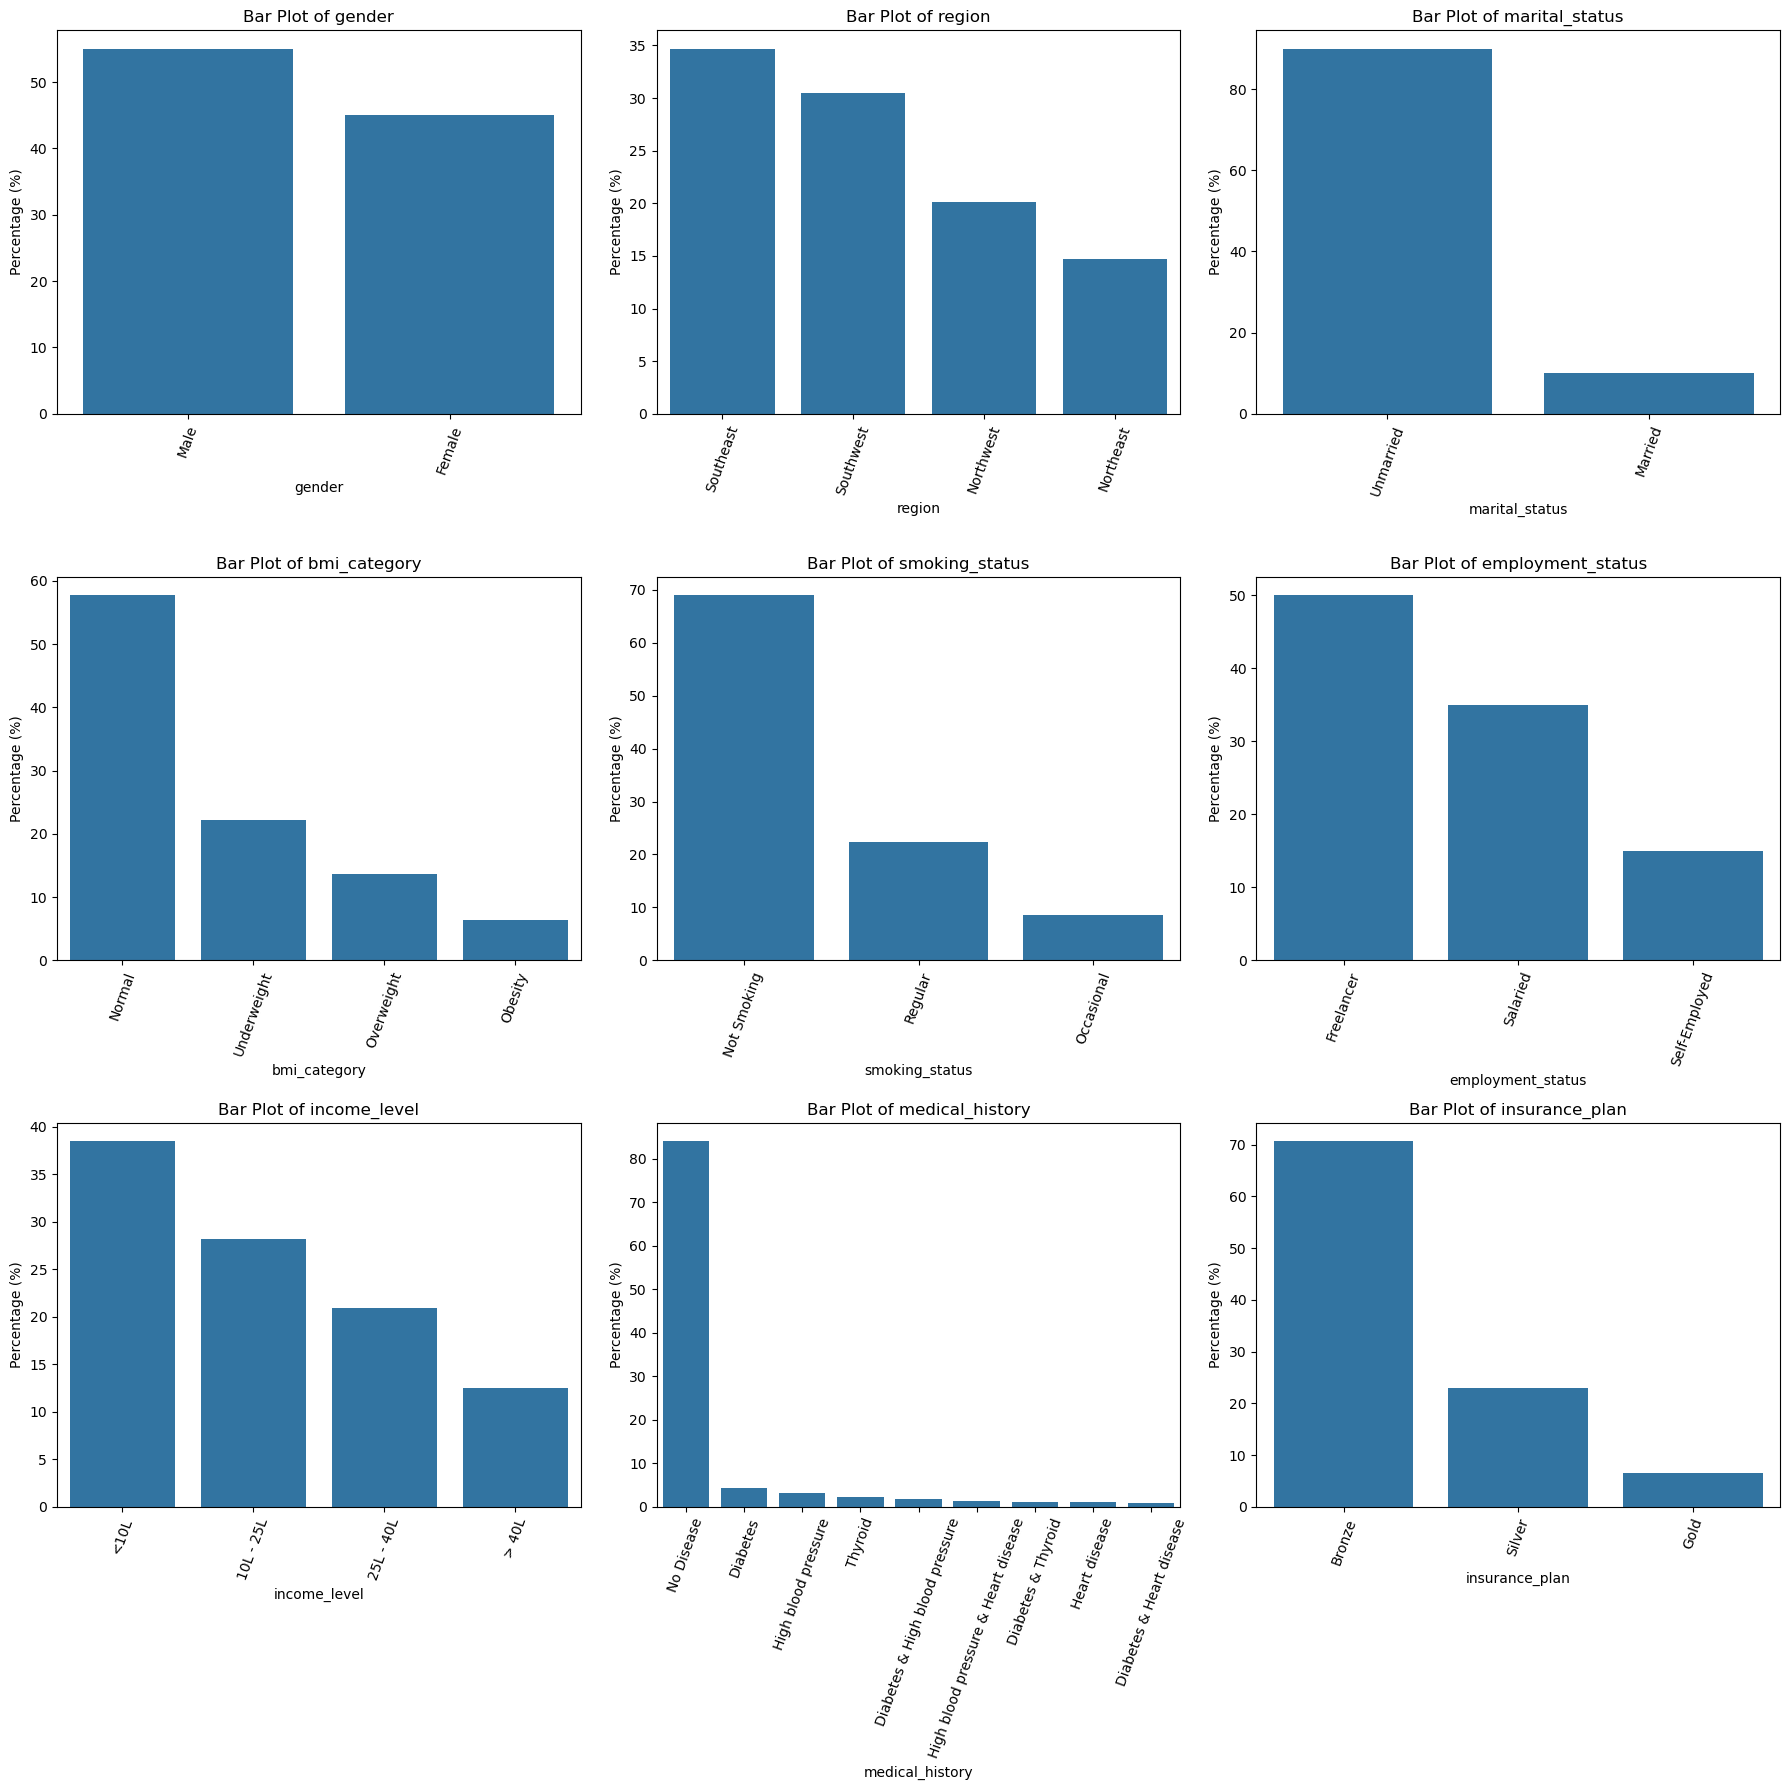

In [146]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()  # Flatten to easily index subplots

# Create a bar plot for each categorical feature
for i, feature in enumerate(categorical_features):
    # Calculate the percentage or count of each category
    pct = df2[feature].value_counts(normalize=True) * 100
    
    # Create the bar plot
    sns.barplot(x=pct.index, y=pct.values, ax=axes[i])
    axes[i].set_title(f'Bar Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Percentage (%)')
    axes[i].tick_params(axis='x', rotation=70)

# Adjust layout
plt.tight_layout()
plt.show()

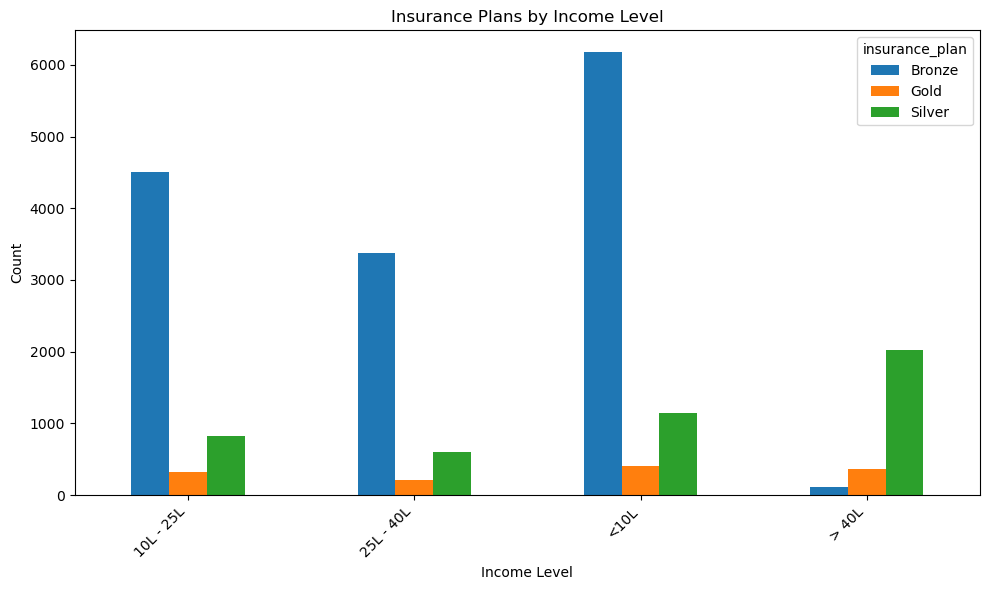

In [147]:
crosstab = pd.crosstab(df["income_level"], df["insurance_plan"])

# Plot the crosstab as a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot with minimal customization
crosstab.plot(kind="bar", ax=ax)

# Add title and labels
ax.set_title('Insurance Plans by Income Level')
ax.set_xlabel('Income Level')
ax.set_ylabel('Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [148]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,Not Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


In [149]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [150]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df2[["disease1","disease2"]] = df2["medical_history"].str.split(" & ",expand=True).apply(lambda x: x.str.lower())

In [151]:
df2['disease1'] = df2['disease1'].fillna('none')
df2['disease2'] = df2['disease2'].fillna('none')
df2["total_risk_score"]=0

for disease in ["disease1","disease2"]:
    df2["total_risk_score"] += df2[disease].map(risk_scores)

df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6
1,22,Female,Northwest,Unmarried,0,Underweight,Not Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0


In [152]:
max_score = df2["total_risk_score"].max()
min_score = df2["total_risk_score"].min()

df2["normalized_risk_score"] = (df2["total_risk_score"] - min_score )/ (max_score - min_score)
df2.head(2)
    

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,Not Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000


In [153]:
df2["insurance_plan"] = df2["insurance_plan"].map({"Bronze":1,"Silver":2,"Gold":3})
df2["income_level"] = df2["income_level"].map({"<10L":1,"10L - 25L":2,"> 40L":4,"25L - 40L":3})
df2 = df2.drop(["medical_history","disease1","disease2","total_risk_score"],axis=1)

In [154]:
nominal_features = ["gender","region","marital_status","bmi_category","smoking_status","employment_status"]
df3 = pd.get_dummies(df2,columns=nominal_features,drop_first=True,dtype=int)
df3.shape

(20086, 20)

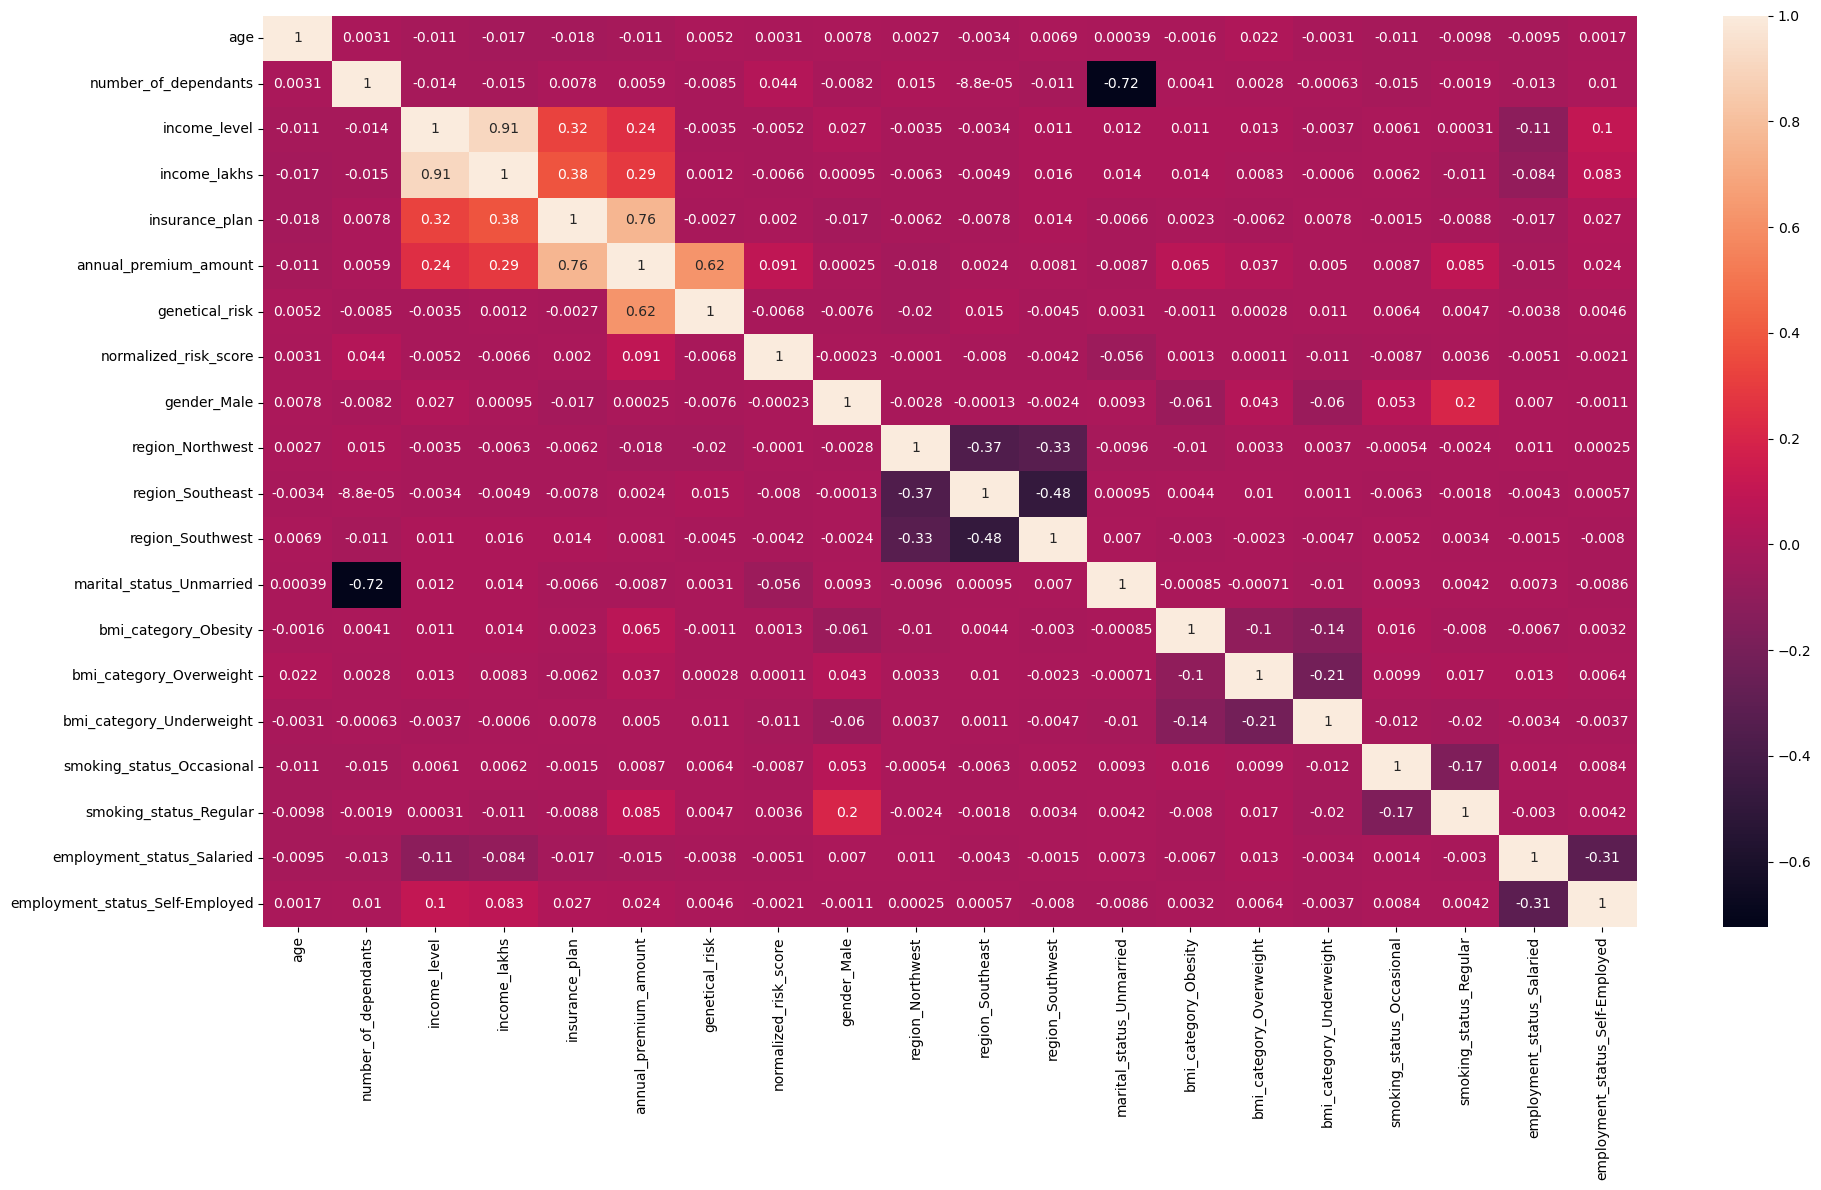

In [155]:
cm = df3.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(cm, annot=True)

plt.tight_layout()
plt.show()

#### Featue Scaling

In [156]:
X = df3.drop("annual_premium_amount",axis=1)
y = df3["annual_premium_amount"]

In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ["age","number_of_dependants","income_lakhs","income_level","insurance_plan","genetical_risk"]
X[cols_to_scale]= scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["columns"] = data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

calculate_vif(X)

,columns,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalized_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [159]:
X = X.drop("income_level",axis=1)

In [160]:
calculate_vif(X)

,columns,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


### Model Training

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((14060, 18), (6026, 18), (6026,), (14060,))

In [162]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

Train_score : 0.9884990017445308
Test_score  : 0.9882609305654483


<BarContainer object of 18 artists>

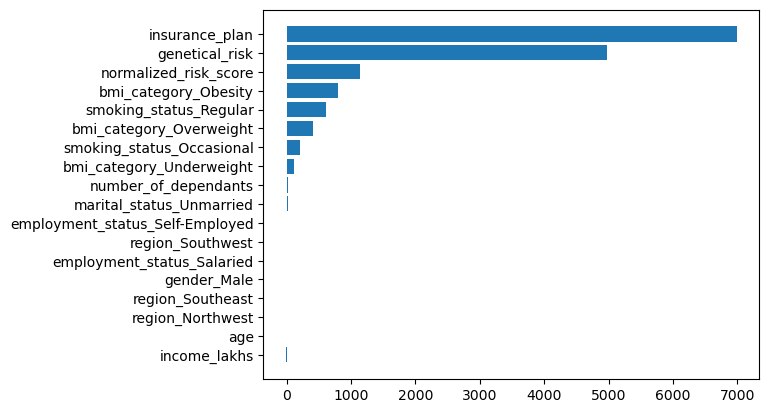

In [163]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
print(f"Train_score : {model_lr.score(X_train,y_train)}")
print(f"Test_score  : {model_lr.score(X_test,y_test)}")

feature_importance = model_lr.coef_

coef_df = pd.DataFrame(feature_importance,index=X_test.columns,columns=["Coefficients"])
coef_df = coef_df.sort_values(by="Coefficients")
plt.barh(coef_df.index,coef_df["Coefficients"])

Train_score : 0.9884396902500883
Test_score  : 0.9881644408550138


<BarContainer object of 18 artists>

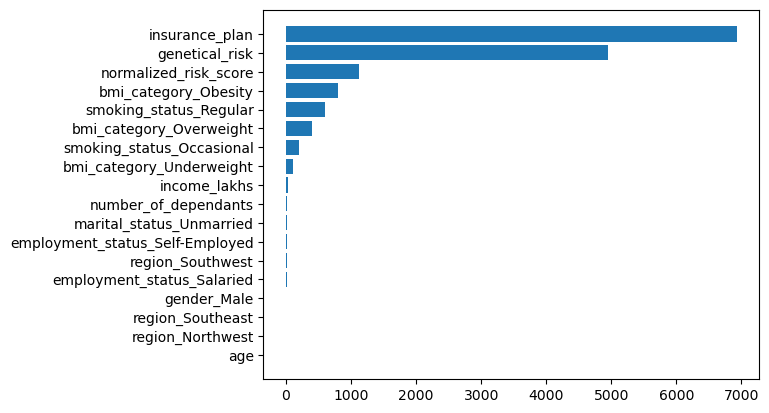

In [164]:
model = Ridge(alpha=10)
model.fit(X_train,y_train)
print(f"Train_score : {model.score(X_train,y_train)}")
print(f"Test_score  : {model.score(X_test,y_test)}")

feature_importance = model.coef_

coef_df = pd.DataFrame(feature_importance,index=X_test.columns,columns=["Coefficients"])
coef_df = coef_df.sort_values(by="Coefficients")
plt.barh(coef_df.index,coef_df["Coefficients"])

In [165]:
model = XGBRegressor()
model.fit(X_train,y_train)
print(f"Train_score : {model.score(X_train,y_train)}")
print(f"Test_score  : {model.score(X_test,y_test)}")

Train_score : 0.9925953149795532
Test_score  : 0.9873469471931458


In [166]:
best_model = model_lr

<BarContainer object of 18 artists>

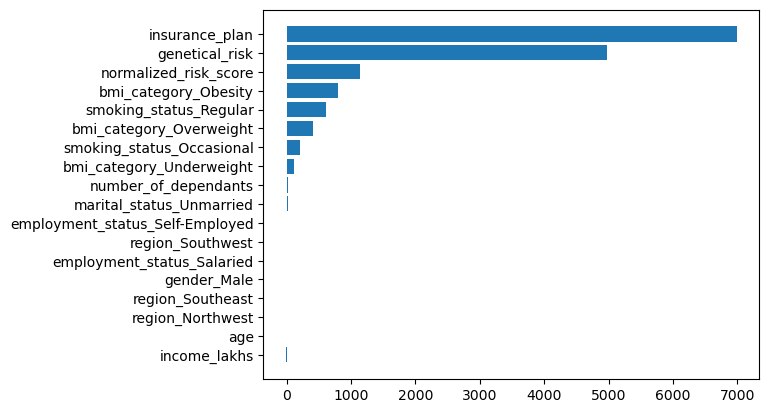

In [167]:
feature_importance = best_model.coef_

coef_df = pd.DataFrame(feature_importance,index=X_test.columns,columns=["Coefficients"])
coef_df = coef_df.sort_values(by="Coefficients")
plt.barh(coef_df.index,coef_df["Coefficients"])

###  Error Analysis

In [168]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals/y_test)*100

results_df = pd.DataFrame({
    "actual" : y_test,
    "predicted" : y_test,
    "difference" : residuals,
    "diff_pct" : residuals_pct
})

results_df.head()

,actual,predicted,difference,diff_pct
10489,5452,5452,28.205181,0.517336
7989,9658,9658,-538.221623,-5.572806
3113,6031,6031,-287.582896,-4.768411
10605,12386,12386,-22.274746,-0.179838
4204,4245,4245,463.266672,10.913231


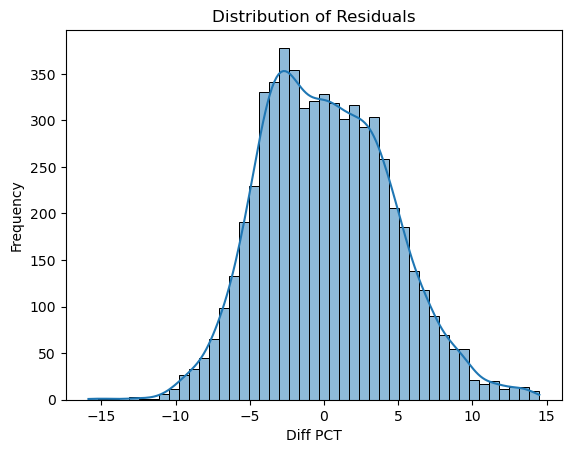

In [169]:
sns.histplot(results_df["diff_pct"],kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [170]:
X_test.shape

(6026, 18)

In [171]:
extreme_error_threshold = 10
extreme_error_df = results_df[np.abs(results_df["diff_pct"])>extreme_error_threshold]
extreme_error_df.head()

,actual,predicted,difference,diff_pct
4204,4245,4245,463.266672,10.913231
13142,4215,4215,478.834818,11.360257
7802,4096,4096,423.165150,10.331180
9881,3952,3952,452.757527,11.456415
18329,4615,4615,491.885700,10.658412


In [172]:
extreme_error_df.shape

(123, 4)

In [173]:
extreme_error_pct = (extreme_error_df.shape[0]*100)/X_test.shape[0]
extreme_error_pct

2.0411549950215733

In [174]:
extreme_error_df[abs(extreme_error_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,predicted,difference,diff_pct


In [175]:
extreme_errors_df = X_test.loc[extreme_error_df.index]
extreme_errors_df.head(2)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
4204,0.000000,0.000000,0.222222,0.0,0.0,0.000000,0,0,1,0,1,0,0,1,0,1,0,0
13142,0.571429,0.666667,0.070707,0.0,0.0,0.428571,0,0,0,1,0,0,0,0,1,0,1,0


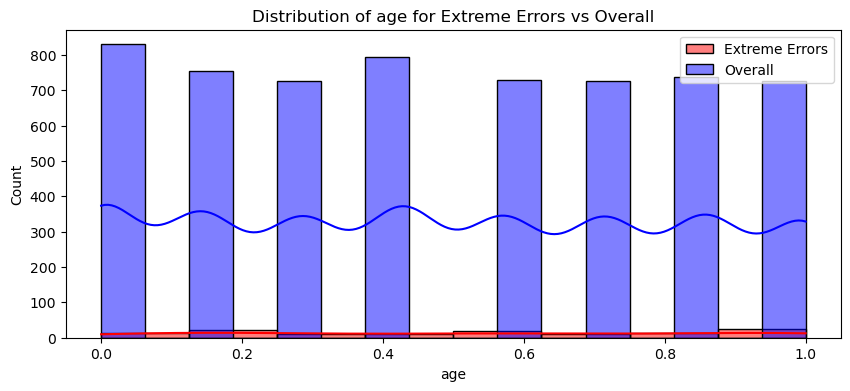

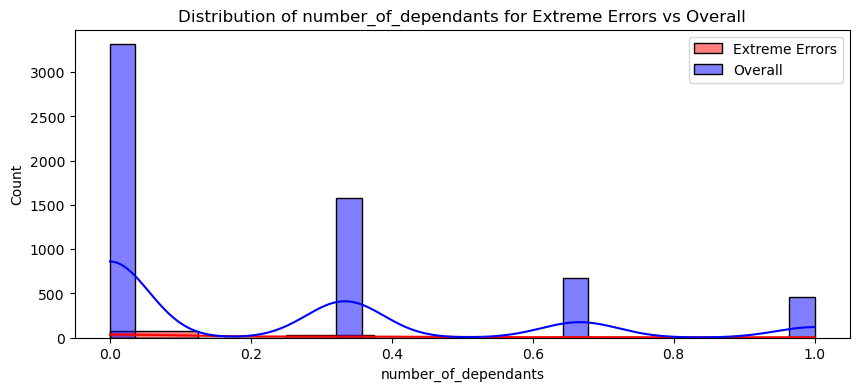

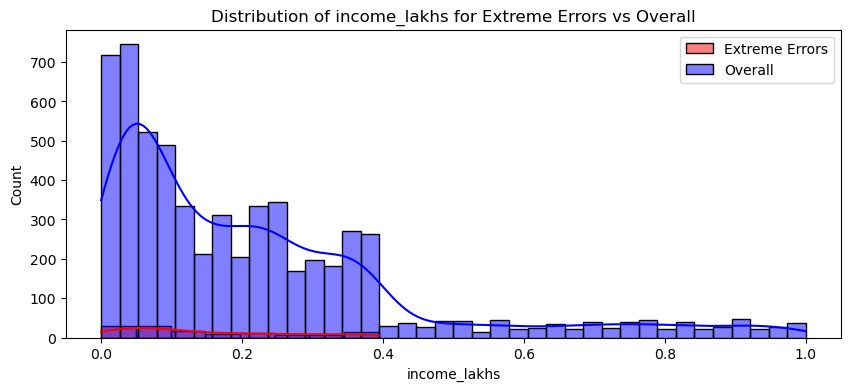

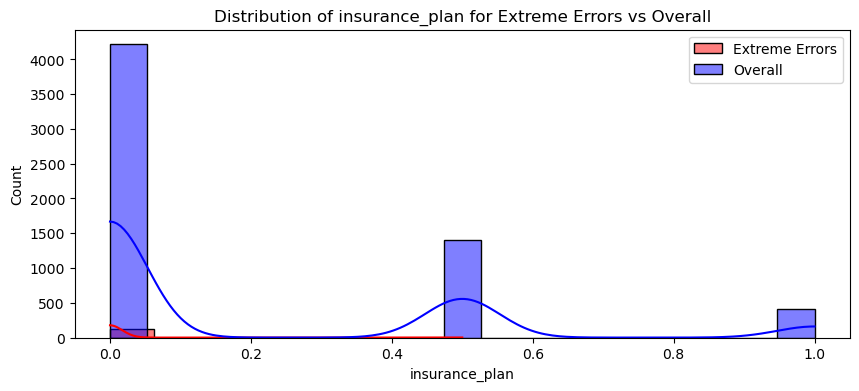

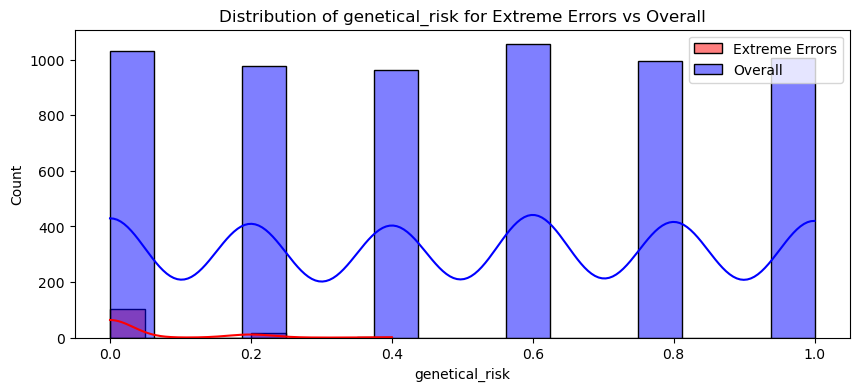

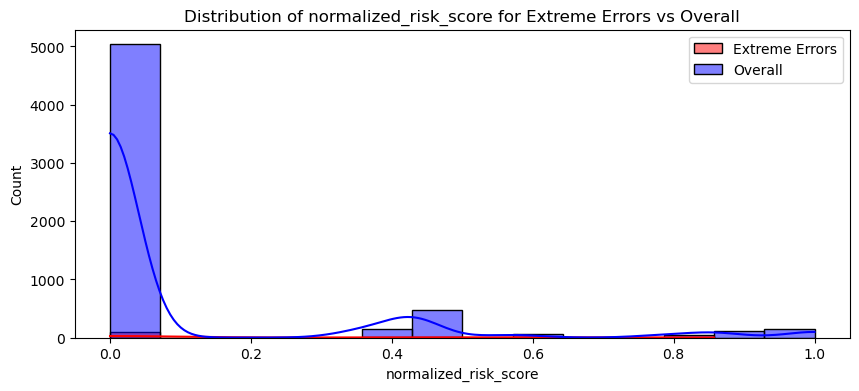

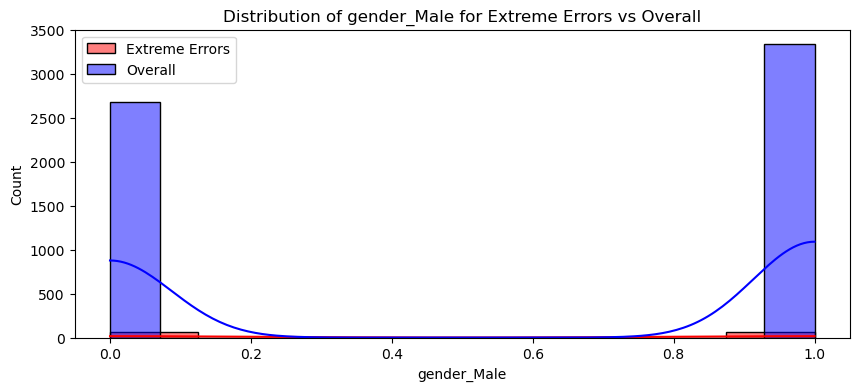

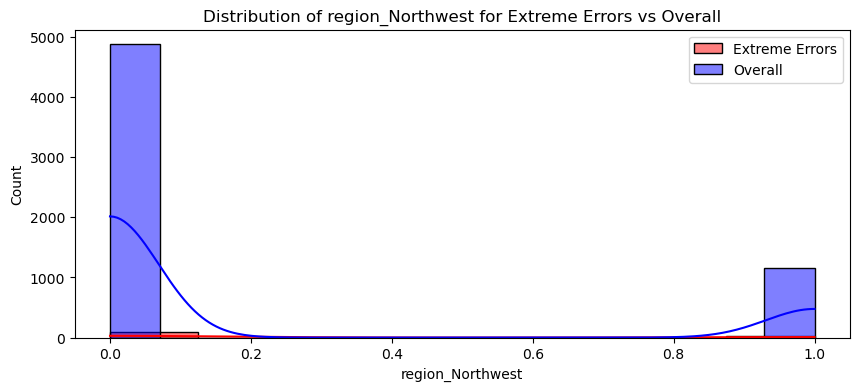

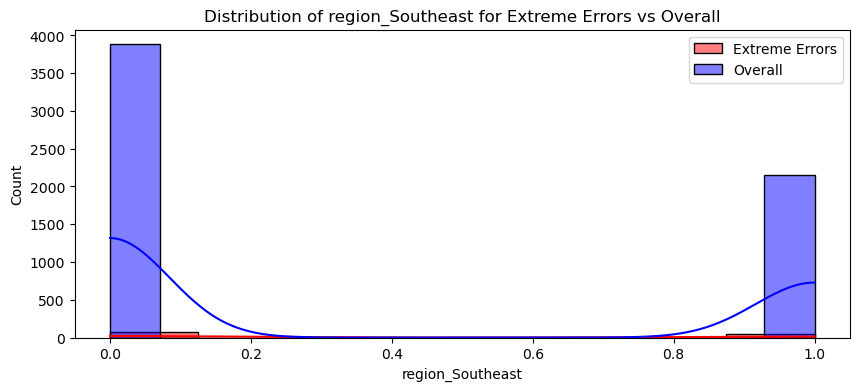

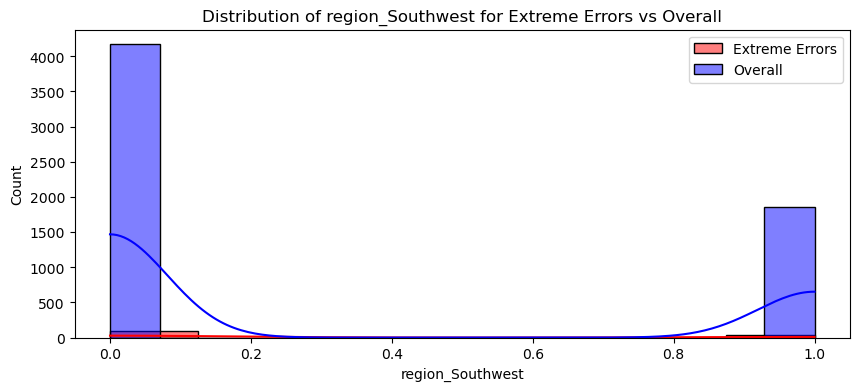

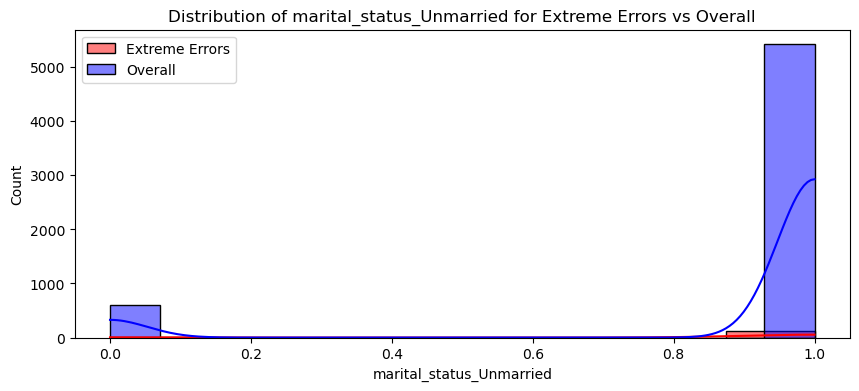

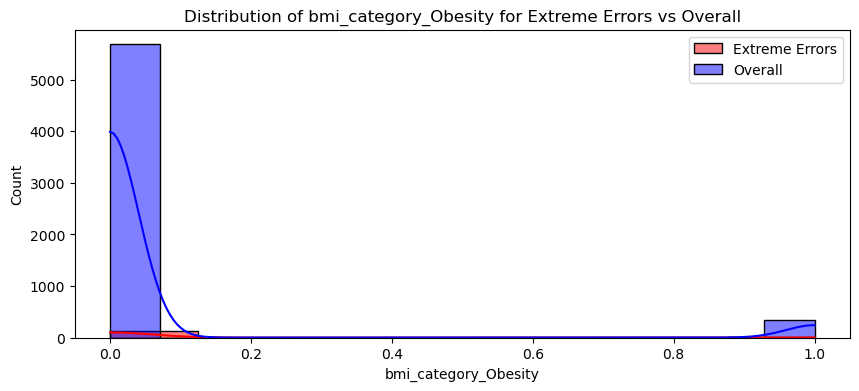

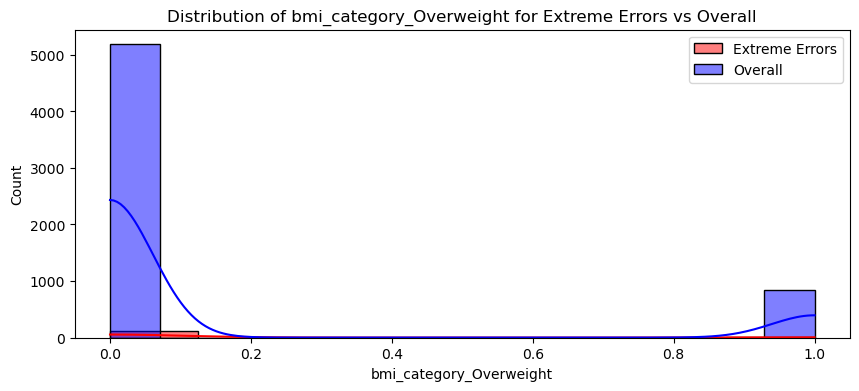

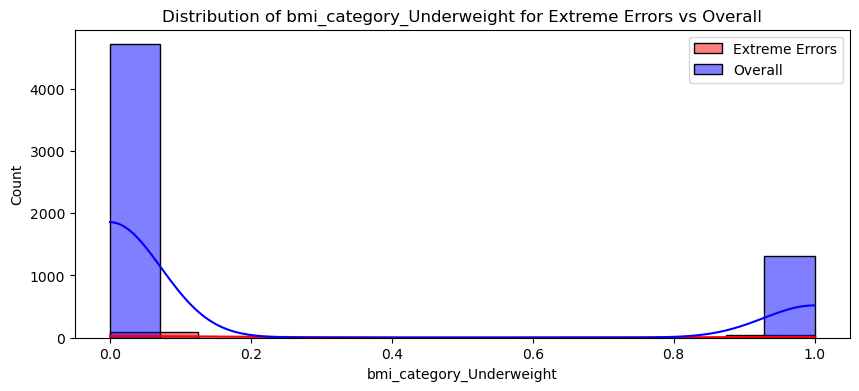

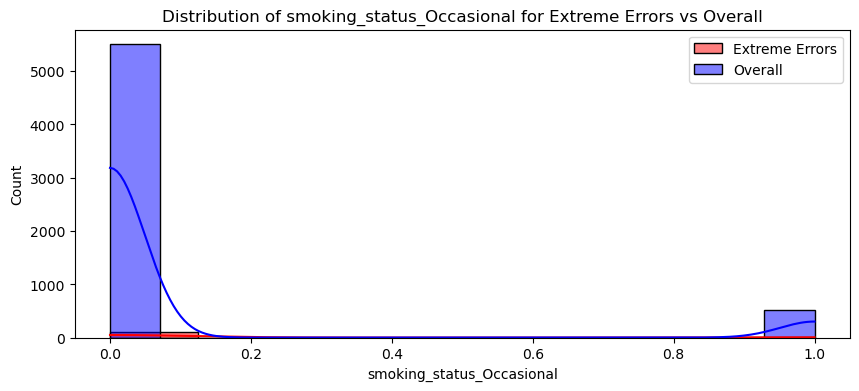

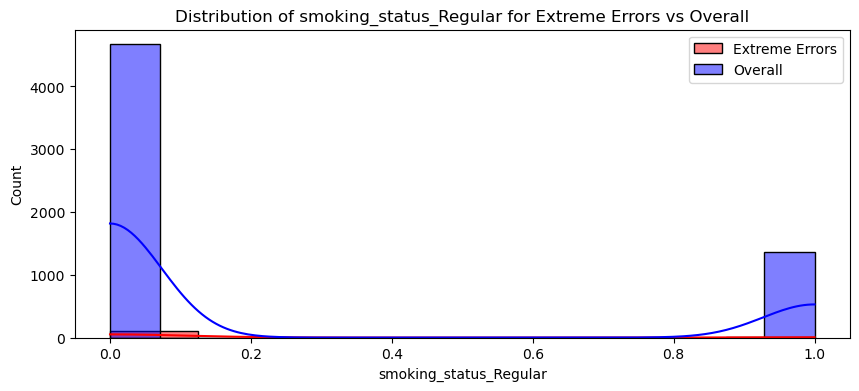

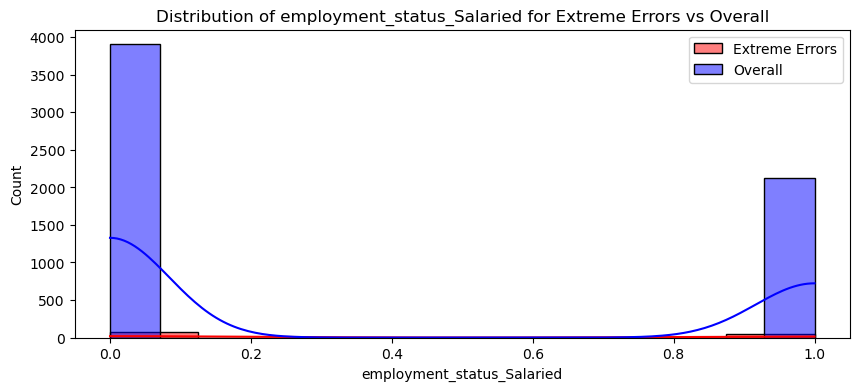

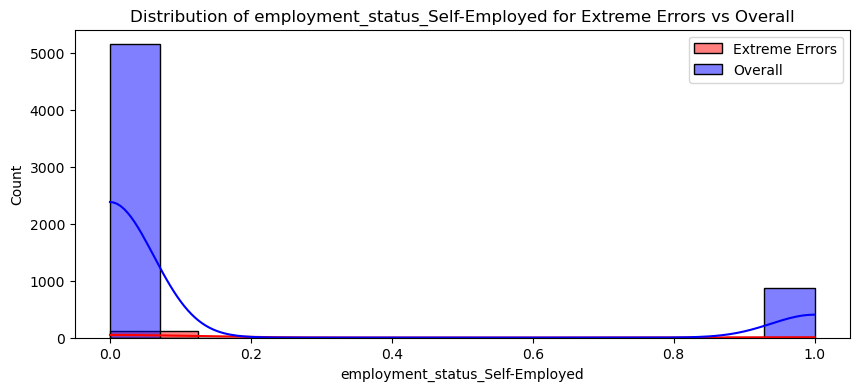

In [176]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

In [177]:
from joblib import dump

dump(best_model,r"E:\ML Projects\Health Care Premium Prediction\app\artifacts\model_young.joblib")
scaler_with_cols = {
    "scaler" : scaler,
    "columns_to_scale" : cols_to_scale
}
dump(scaler_with_cols,r"E:\ML Projects\Health Care Premium Prediction\app\artifacts\scaler_young.joblib")

['E:\\ML Projects\\Health Care Premium Prediction\\app\\artifacts\\scaler_young.joblib']